In [1]:
from bias_correction import XBiasCorrection
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
obs_data = np.random.randn(2*365, 34, 65)
model_data = np.random.randn(2*365, 34, 65)
sce_data = np.random.randn(365, 34, 65)

lat = range(34)
lon = range(65)

obs_data = xr.DataArray(obs_data, dims=['time','lat','lon'], \
                        coords=[pd.date_range('2010-01-01', '2011-12-31', freq='D'), lat, lon])
model_data = xr.DataArray(model_data, dims=['time','lat','lon'], \
                          coords=[pd.date_range('2010-01-01', '2011-12-31', freq='D'), lat, lon])
sce_data = xr.DataArray(sce_data, dims=['time','lat','lon'], \
                        coords=[pd.date_range('2019-01-01', '2019-12-31', freq='D'), lat, lon])

# combining dataarrays to form dataset with same timelength otherwise correction will give error
ds = xr.Dataset({'model_data':model_data,'obs_data':obs_data, 'sce_data':sce_data})
ds['sce_data']

<xarray.DataArray 'sce_data' (time: 1095, lat: 34, lon: 65)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       ...,

       [[-0.31188153,  0.5529335 , -0.65321869, ...,  0.60829499,
         -0.5997034 ,  0.4326103 ],
        [-0.09613956,  0.05374286, -0.14298554, ...,  0.33310326,
          0.16997065,  0.4566534 ],
        [ 0.94122192,  0.38324842,  2.45626261, ...,  0.40692972,
         -0.55386503,  0.82641967],
        ...,
        [-0.8496429 ,  0.12599112, -0.24874244, ..., -0.4274115 ,
          1.49839452, -1.04854107],
        [-0.28520159, -0.50658993, -0.06632819, ...,  2.95119285,
          0.9244818 ,  1.04228535],
        [ 0.64740447, -1.29210619, -0.69822997, ...,  0.36958261,
          0.03950903,  0.3493236 ]],

       [[ 2.17677351, -0.79398228,  1.27113898, ..., -0.97816711,
          0.58704494, -1.13474018],
        [ 1.22499832, -0.06660066, -0.1215601 , ...,  1.1279193 ,
         -1.57683746,  0.89451286],
        [ 1.5775075 , -0.85663019,  0.69940005, ...,  0.26418093,
          1.19288564, -1.49753983],
        ...,
        [-0.88523588,  1.73606766,  0.72076956, ...,  0.65076621,
         -0.64299629,  0.75951002],
        [-0.32244479, -0.35294579,  2.13715061, ...,  1.42992438,
          0.36113571, -0.66970466],
        [-1.02499754, -0.96966289, -0.01937744, ..., -2.71257156,
          0.02866161,  0.22993817]],

       [[ 1.62328585, -0.25238879,  0.12906893, ...,  0.17941774,
         -1.15489432, -0.52559629],
        [-0.36454095, -2.52436231,  0.37627719, ..., -0.52174564,
          1.0663822 ,  1.19112069],
        [-0.742571  , -0.64406027, -0.22338591, ...,  0.20635935,
          0.38454748,  2.04241331],
        ...,
        [ 0.68482394,  1.92170295, -0.81438498, ..., -0.4977902 ,
          0.03410048, -2.58396702],
        [ 0.34705311, -0.66946133,  1.1624822 , ...,  1.46937343,
         -0.86551146, -1.85392432],
        [-0.26417324, -0.47309967, -0.01503534, ..., -1.38374986,
         -0.42624416, -0.3278485 ]]])
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2019-12-31
  * lat      (lat) int64 0 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31 32 33


In [3]:
bc = XBiasCorrection(ds['obs_data'], ds['model_data'], ds['sce_data'])
# df1 = bc.correct(method='modified_quantile')
# df2 = bc.correct(method='basic_quantile')
df3 = bc.correct(method='gamma_mapping')

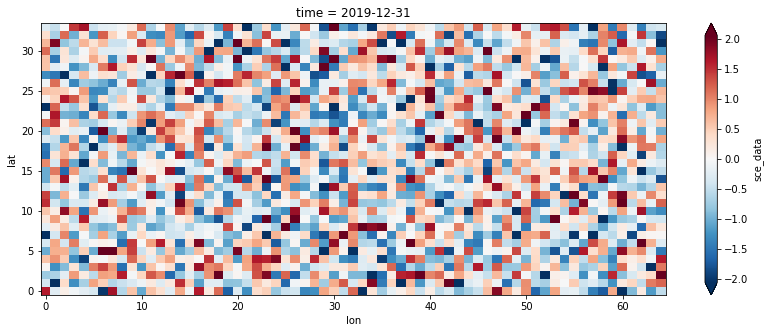

In [4]:
bc.sce_data.sel(time='2019-12-31').plot(figsize=(14, 5), robust=True)
plt.show()

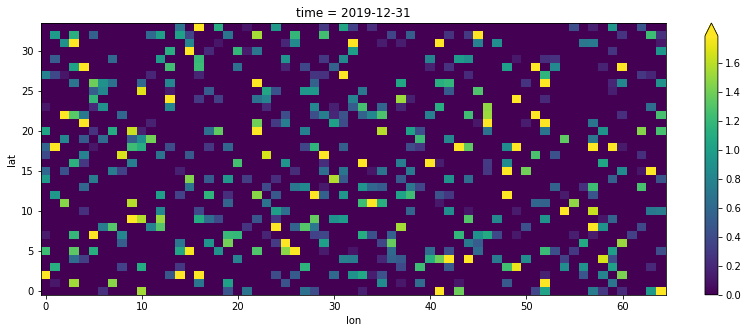

In [5]:
df3.sel(time='2019-12-31').plot(figsize=(14, 5), robust=True)
plt.show()